Natalie Rehfeld
1. (10 points) Consider the “Bushing Diameter 2 Batches.XLS” file. Two quality characteristics X and Y on a brass bushing part are shown in Figure 2 (See the lab manual.) A brass bar was first cut to 1.25" length X and then, the outside diameter Y was turned to 1.00".  Please describe the population of both batches using graphical and numerical methods such as descriptive statistics, confidence intervals, time series plot, histogram, boxplot, normal probability plot, etc. Discuss the outputs.  The Excel file listed below contains the outside diameter measurement of two batches with 50 brass bushings each. You may have to save the Excel XLS file into the csv file before it can be read into colab.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import math
import pandas as pd
import statistics as stats
import numpy as np
import scipy.stats
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [4]:
data=pd.read_csv('drive/MyDrive/BUSHING DIAMETER 2 BATCHES.csv', sep=',', na_values=".")
data

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990
5,1.015,1.005
6,1.000,1.015
7,1.010,1.000
8,0.999,1.005
9,1.010,0.990


In [5]:
data.describe()

,Batch 1,Batch 2
count,50.000000,50.000000
mean,1.003360,1.003660
std,0.007714,0.007227
min,0.985000,0.990000
25%,0.999000,1.000000
50%,1.001000,1.005000
75%,1.009000,1.006750
max,1.025000,1.019000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f06a0465cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f06a046f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06a0465790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f06a0477290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f06a04777d0>,
 'means': []}

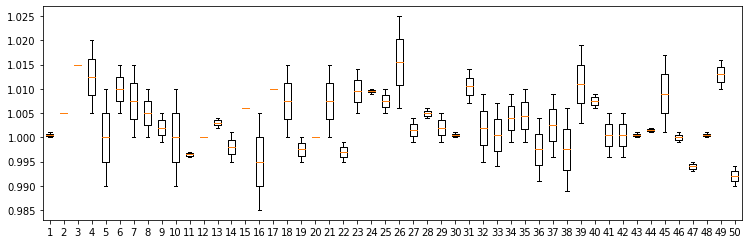

In [6]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(data, notch=None, vert=None, patch_artist=None, widths=None)

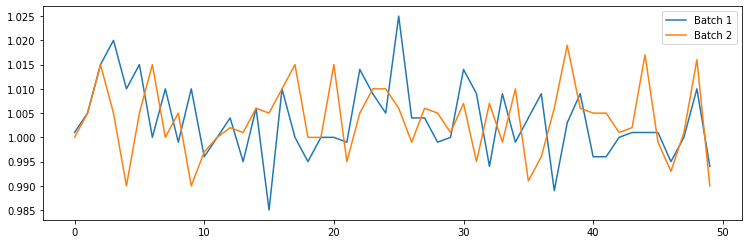

In [7]:
data.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f069d19b2d0>,
      dtype=object)

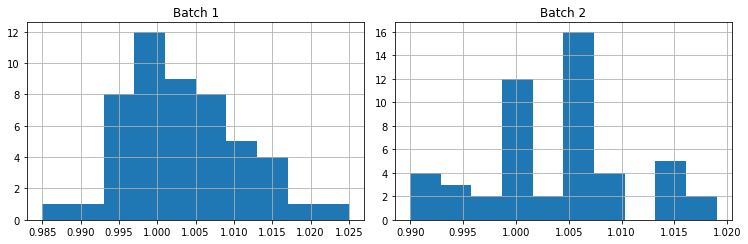

In [8]:
data.hist()

In [9]:
CF = 0.95
df = data.size-1
mean = np.mean(data['Batch 1'])
std = scipy.stats.sem(data['Batch 1'])

confidence_interval1 = scipy.stats.t.interval(CF, df, mean, std )

print(confidence_interval1)

(1.0011954672985737, 1.0055245273814264)


In [10]:
CF = 0.95
df = data.size-1
mean = np.mean(data['Batch 2'])
std = scipy.stats.sem(data['Batch 2'])

confidence_interval2 = scipy.stats.t.interval(CF, df, mean, std )

print(confidence_interval2)

(1.0016320420248268, 1.005687966215173)


Both batches are very similar in their ranges of numbers. Batch 1 has a larger amount of numbers centered at 1.025. Batch 2 has a fairly even spread of bigger observations.

2. (10 points) Can you conclude that both batches are from different populations? Use proper statistical inference statements to answer this question. What are the hypotheses? Provide appropriate assumptions, use proper statistical methods and graphs, and discuss the results. You can use either colab (CO) or Hand-Calculation (HC). If you use colab, provide the or ipynb link (via Github in the text entry). But if you choose to run CO, make sure you define the random variable and formulate the hypothesis tests in the text box before the computation/code cell.


Null Hypothesis: mean of batch 1 = mean of batch 2,  mean of batch1 does not equal mean of batch 2

In [14]:
scipy.stats.ttest_ind(data['Batch 1'], data['Batch 2'], equal_var=True)

Ttest_indResult(statistic=-0.20069320812014202, pvalue=0.8413543932394967)

We have a P value of 0.841 at a confidence level of 95%. Our P value is above 0.05, therefore, we cannot reject the null hypothesis. This means the mean of Batch 1 and 2 do equal each other. 


3. (10 points) Chapter 4 Montgomery 7th Edition – Exercise 4.6. (CO or HC)

a. t0=-2.80 [.005, .0025]
b. t0=-1.75 [.05, .025]
c. t0=-2.54 [.01, .005]
d. t0=-2.05 [.05, .025]


4. (10 points) Chapter 4 Montgomery 7th Edition – Exercise 4.11. (CO or HC)

In [16]:
data4 = pd.read_csv('drive/MyDrive/Homework4_6.11 Data.csv', sep=',', na_values=".")
data4

,Number,Thickness
0,1,13.3987
1,2,13.3957
2,3,13.3902
3,4,13.4015
4,5,13.4001
5,6,13.3918
6,7,13.3965
7,8,13.3925
8,9,13.3946
9,10,13.4002


  
  H0: mu1=13.4,
  H1: mu1=/13.4,
  Alpha=0.05

In [18]:
scipy.stats.ttest_1samp(data4['Thickness'], 13.4)

Ttest_1sampResult(statistic=-3.0905771237069133, pvalue=0.012917430540578496)

In [19]:
scipy.stats.t.interval(.05, 9, np.mean(data4['Thickness']), np.std(data4['Thickness']) )

(13.395940917141044, 13.396419082858959)

<function matplotlib.pyplot.show(*args, **kw)>

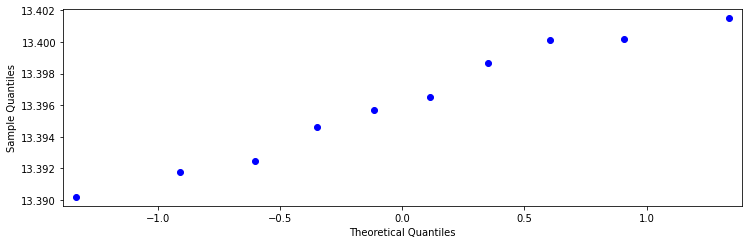

In [22]:
fig = sm.qqplot(data4['Thickness'])
plt.show

C. the normality assumption seems reasonable. the fat pencil test points on the graph shows us a normal degree of 45 with these points